

# Project: Investigate European Soccer Database
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> In this project, I will be analyzing the European Soccer Database. The database contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.<br><br>
> The tables in the database are as follows: [Country, League, Match, Player, Player_Attributes, Team, Team_Attributes]. I will be using the tables Match, Team, and Team_Attributes.<br><br>
> in the Match table I will be focusing on the following columns: season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, and away_team_goal<br><br>
> in the Team table I will be focusing on the following columns: team_api_id, and team_long_name.<br><br>
> in the Team_Attributes table I will be focusing on the following columns: team_api_id, defencePressureClass, defenceAggressionClass, defenceTeamWidthClass, and defenceDefenderLineClass.


### Question(s) for Analysis
 I will be focusing on the following questions:
> 1. Which season has the most goals? In each season who scored more home or away teams? And which team has the most goals?
> 2. What teams tend to win more, home or away teams?
> 3. What team defensive attribute classes are the most used. And which ones lead to the most victories?

> **Note**: I will focus on data from the English Premier League (EPL) only. Furthermore, data from seasons 2013/2014 and 2014/2015 will be used. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Here we are reading the data from the database file and storing it in a dataframe, we will store each table in a separate dataframe
match_query = 'SELECT season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal from Match where league_id = 1729 and (date BETWEEN "2013-08-17" and "2015-05-25") ORDER by date ASC'
team_query = 'SELECT team_api_id, team_long_name from Team'
team_attributes_query = 'SELECT team_api_id, defencePressureClass, defenceAggressionClass, defenceTeamWidthClass, defenceDefenderLineClass from Team_Attributes'
match_df = pd.read_sql_query(match_query, sqlite3.connect('data/database.sqlite')) # This will select the matches of the EPL and the season 2013/2014 and 2014/2015 and store it in a dataframe
team_df = pd.read_sql_query(team_query, sqlite3.connect('data/database.sqlite')) # This will select all the teams and store it in a dataframe
team_attributes_df = pd.read_sql_query(team_attributes_query, sqlite3.connect('data/database.sqlite')) # This will select all the team attributes and store it in a dataframe

In [4]:
# First we will merge the team and team attributes dataframes to get the team attributes for each team
team_df = pd.merge(team_df, team_attributes_df, on='team_api_id')
team_df = team_df.drop_duplicates(subset=['team_api_id']).iloc[:, 0:6] # We will drop the duplicates and keep only the first occurence of each team

In [5]:
# Now we well select EPL teams only
team_df = team_df[team_df['team_long_name'].isin(['Arsenal', 'Aston Villa', 'Chelsea', 'Everton', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Norwich City', 'Southampton', 'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United'])]
team_df = team_df.reset_index(drop=True)
team_df.head(20)

,team_api_id,team_long_name,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,10260,Manchester United,Medium,Press,Normal,Cover
1,10261,Newcastle United,Medium,Press,Normal,Cover
2,9825,Arsenal,Deep,Press,Normal,Cover
3,8659,West Bromwich Albion,High,Double,Wide,Cover
4,8472,Sunderland,Medium,Double,Normal,Cover
5,8650,Liverpool,Medium,Press,Normal,Cover
6,8654,West Ham United,Deep,Double,Narrow,Cover
7,10252,Aston Villa,Deep,Double,Narrow,Cover
8,8456,Manchester City,Medium,Press,Normal,Cover
9,8668,Everton,Medium,Double,Normal,Cover


In [6]:
# Now we will merge the match dataframe with the team dataframe to get the team names instead of the team ids and drop the team ids
match_df2 = pd.merge(match_df, team_df, left_on='home_team_api_id', right_on='team_api_id')
match_df2 = match_df2.drop('team_api_id', axis=1)
match_df2 = pd.merge(match_df2, team_df, left_on='away_team_api_id', right_on='team_api_id')
match_df2 = match_df2.drop('team_api_id', axis=1)
match_df2 = match_df2.drop('home_team_api_id', axis=1)
match_df2 = match_df2.drop('away_team_api_id', axis=1)

In [7]:
# Now we will remove the time from the date column and sort the dataframe by date
match_df2['date'] = match_df2['date'].apply(lambda x: x[:10])
match_df2 = match_df2.sort_values(by='date')
match_df2 = match_df2.reset_index(drop=True)
match_df2.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,team_long_name_x,defencePressureClass_x,defenceAggressionClass_x,defenceTeamWidthClass_x,defenceDefenderLineClass_x,team_long_name_y,defencePressureClass_y,defenceAggressionClass_y,defenceTeamWidthClass_y,defenceDefenderLineClass_y
0,2013/2014,1,2013-08-17,1474058,1,3,Arsenal,Deep,Press,Normal,Cover,Aston Villa,Deep,Double,Narrow,Cover
1,2013/2014,1,2013-08-17,1474079,1,4,Swansea City,High,Double,Wide,Cover,Manchester United,Medium,Press,Normal,Cover
2,2013/2014,1,2013-08-17,1474065,1,0,Liverpool,Medium,Press,Normal,Cover,Stoke City,Medium,Double,Normal,Cover
3,2013/2014,1,2013-08-17,1474070,2,2,Norwich City,Medium,Double,Wide,Cover,Everton,Medium,Double,Normal,Cover
4,2013/2014,1,2013-08-17,1474083,0,1,West Bromwich Albion,High,Double,Wide,Cover,Southampton,High,Double,Wide,Cover


In [8]:
# Now we will rename the columns to make them more readable
match_df = match_df2.rename(columns={'team_long_name_x': 'home', 'team_long_name_y': 'away', 'defencePressureClass_x': 'home_pressure', 'defenceAggressionClass_x': 'home_aggression', 'defenceTeamWidthClass_x': 'home_width', 'defenceDefenderLineClass_x': 'home_defenderLine', 'defencePressureClass_y': 'away_pressure', 'defenceAggressionClass_y': 'away_aggression', 'defenceTeamWidthClass_y': 'away_width', 'defenceDefenderLineClass_y': 'away_defenderLine'})

In [9]:
# Now we have one dataframe with all the data we need
match_df.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,home,home_pressure,home_aggression,home_width,home_defenderLine,away,away_pressure,away_aggression,away_width,away_defenderLine
0,2013/2014,1,2013-08-17,1474058,1,3,Arsenal,Deep,Press,Normal,Cover,Aston Villa,Deep,Double,Narrow,Cover
1,2013/2014,1,2013-08-17,1474079,1,4,Swansea City,High,Double,Wide,Cover,Manchester United,Medium,Press,Normal,Cover
2,2013/2014,1,2013-08-17,1474065,1,0,Liverpool,Medium,Press,Normal,Cover,Stoke City,Medium,Double,Normal,Cover
3,2013/2014,1,2013-08-17,1474070,2,2,Norwich City,Medium,Double,Wide,Cover,Everton,Medium,Double,Normal,Cover
4,2013/2014,1,2013-08-17,1474083,0,1,West Bromwich Albion,High,Double,Wide,Cover,Southampton,High,Double,Wide,Cover



### Data Cleaning


In [10]:
# We cleaned the data from duplicates previously, now we will check if there are any missing values, or if there are inconsistencies in the data types
print(match_df.shape)
match_df.info()

(450, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   season             450 non-null    object
 1   stage              450 non-null    int64 
 2   date               450 non-null    object
 3   match_api_id       450 non-null    int64 
 4   home_team_goal     450 non-null    int64 
 5   away_team_goal     450 non-null    int64 
 6   home               450 non-null    object
 7   home_pressure      450 non-null    object
 8   home_aggression    450 non-null    object
 9   home_width         450 non-null    object
 10  home_defenderLine  450 non-null    object
 11  away               450 non-null    object
 12  away_pressure      450 non-null    object
 13  away_aggression    450 non-null    object
 14  away_width         450 non-null    object
 15  away_defenderLine  450 non-null    object
dtypes: int64(4), object(12)
memory usa

In [11]:
# We notice that there are no missing values, and the data types are correct. However, it is better to convert the date column to datetime type
match_df['date'] = pd.to_datetime(match_df['date'])

In [12]:
# Lets see the number of matches played by each team
print(match_df['away'].value_counts() + match_df['home'].value_counts())
# We notice that Norwich city played less that the rest of the teams, because they were relegated from the EPL. So it is better to remove it from the dataframe to avoid anomalies

Arsenal                 58
Aston Villa             58
Chelsea                 58
Everton                 58
Liverpool               58
Manchester City         58
Manchester United       58
Newcastle United        58
Norwich City            30
Southampton             58
Stoke City              58
Sunderland              58
Swansea City            58
Tottenham Hotspur       58
West Bromwich Albion    58
West Ham United         58
dtype: int64


In [13]:
# We will remove Norwich city from the dataframe
match_df = match_df[match_df['away'] != 'Norwich City']
match_df = match_df[match_df['home'] != 'Norwich City']
match_df = match_df.reset_index(drop=True)
print(match_df['away'].value_counts() + match_df['home'].value_counts())

Arsenal                 56
Aston Villa             56
Chelsea                 56
Everton                 56
Liverpool               56
Manchester City         56
Manchester United       56
Newcastle United        56
Southampton             56
Stoke City              56
Sunderland              56
Swansea City            56
Tottenham Hotspur       56
West Bromwich Albion    56
West Ham United         56
dtype: int64


Now we have the same number of matches for each team. We notice also that each team played 56 matches in the season 2013/2014 and 2014/2015. <br>
Considering that there are 15 teams in the database, 14 multiplied by 2 = 28, for one season, and for two seasons it is 28 multiplied by 2 = 56, so each team played 56 matches in total. Which is correct.

<a id='eda'></a>
## Exploratory Data Analysis



### 1. Which season has the most goals? In each season who scored more home or away teams? And which team has the most goals?

In [14]:
# To simplify the analysis, we will create a function that will help us do the visualization of the data. We will create functions for plotting scatter charts, bar charts, and histograms
def plot_chart(graph, df, x, y, title, xlabel, ylabel, figsize=(10, 5)):
    df.plot(kind=graph, x=x, y=y, figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [16]:
# First we will count the number of goals scored for each season
goals = match_df.groupby('season')['home_team_goal', 'away_team_goal'].sum()
goals['total'] = goals['home_team_goal'] + goals['away_team_goal']
goals['season'] = goals.index

C:\Users\inter\AppData\Local\Temp\ipykernel_17264\3949653779.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  goals = match_df.groupby('season')['home_team_goal', 'away_team_goal'].sum()


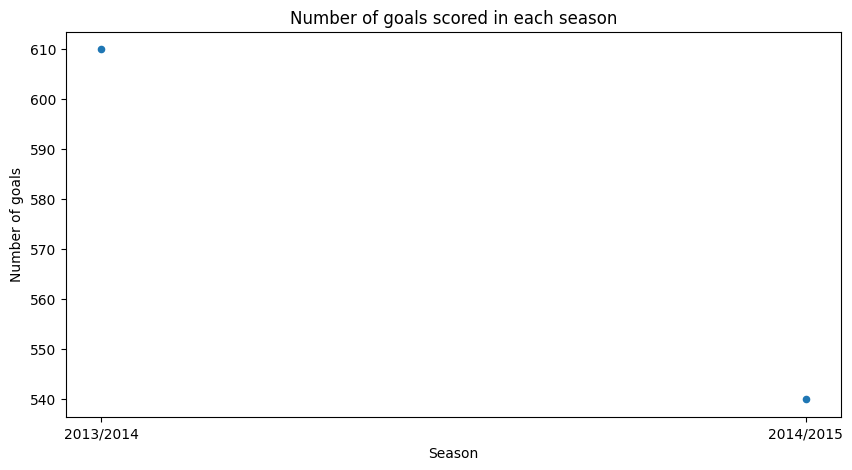

In [17]:
# Now we will plot the number of goals scored for each season
plot_chart('scatter', goals, 'season', 'total', 'Number of goals scored in each season', 'Season', 'Number of goals', (10, 5))

We can observe from the graph above that the goals in 2014/2015 season has decreased from 2013/2014 season. <br>

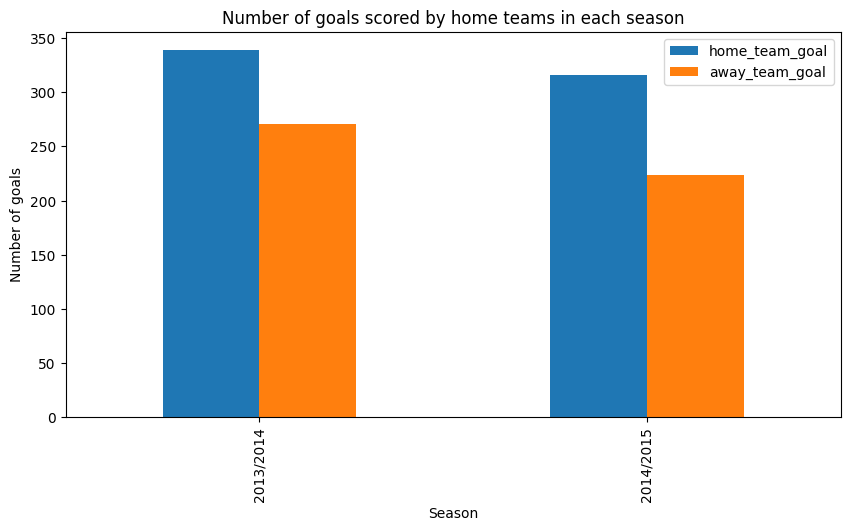

In [32]:
# Now we will compare the number of goals scored by home and away teams for each season and plot it as a bar chart
plot_chart('bar', goals, 'season', ['home_team_goal', 'away_team_goal'], 'Number of goals scored by home teams in each season', 'Season', 'Number of goals', (10, 5))

We can also observe that the home teams scored more goals than the away teams in both seasons. <br>
Also we can observe that the bigger difference in the goals scored between the two seasons is in the goals scored by the away teams. <br>

In [19]:
# Now we will see the number of goals scored by each team
goals_by_team = match_df.groupby('home')['home_team_goal'].sum() + match_df.groupby('away')['away_team_goal'].sum()
goals_by_team = goals_by_team.sort_values(ascending=False)

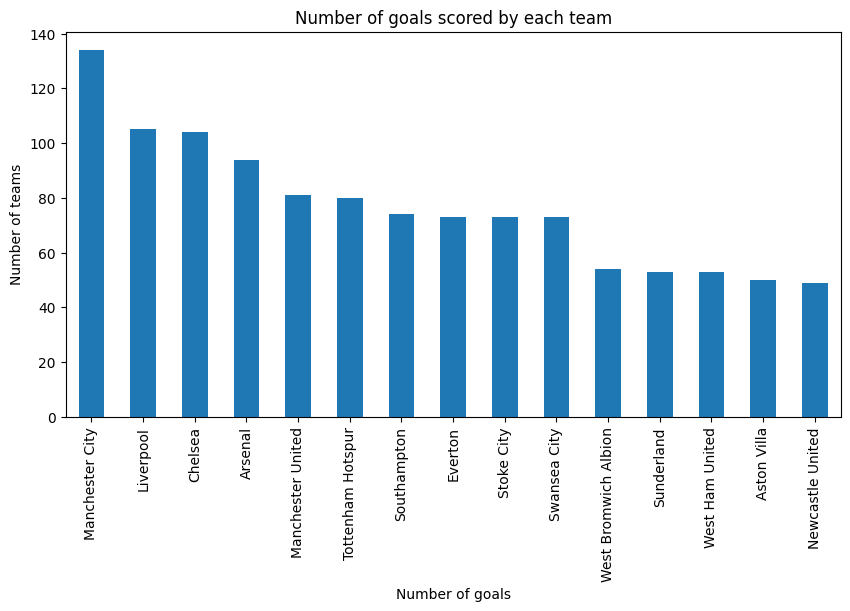

In [33]:
# Now we will plot the number of goals scored by each team as a bar chart
plot_chart('bar', goals_by_team, 'Number of goals', 'Number of teams', 'Number of goals scored by each team', 'Number of goals', 'Number of teams', (10, 5))

We can observe that the team with more goals scored in the seasons 2013/2014 and 2014/2015 is Manchester city. <br>
and the team with less goals scored in the seasons 2013/2014 and 2014/2015 is Newcastle United. <br>

### 2. What teams tend to win more, home or away teams?

In [21]:
# First will add a column to the dataframe that will indicate the result of the match calculated from the home and away goals. It will be called 'winner'
match_df['winner'] = match_df.apply(lambda x: 'home' if x['home_team_goal'] > x['away_team_goal'] else ('away' if x['home_team_goal'] < x['away_team_goal'] else 'draw'), axis=1)
match_df.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,home,home_pressure,home_aggression,home_width,home_defenderLine,away,away_pressure,away_aggression,away_width,away_defenderLine,winner
0,2013/2014,1,2013-08-17,1474058,1,3,Arsenal,Deep,Press,Normal,Cover,Aston Villa,Deep,Double,Narrow,Cover,away
1,2013/2014,1,2013-08-17,1474079,1,4,Swansea City,High,Double,Wide,Cover,Manchester United,Medium,Press,Normal,Cover,away
2,2013/2014,1,2013-08-17,1474065,1,0,Liverpool,Medium,Press,Normal,Cover,Stoke City,Medium,Double,Normal,Cover,home
3,2013/2014,1,2013-08-17,1474083,0,1,West Bromwich Albion,High,Double,Wide,Cover,Southampton,High,Double,Wide,Cover,away
4,2013/2014,1,2013-08-19,1474068,4,0,Manchester City,Medium,Press,Normal,Cover,Newcastle United,Medium,Press,Normal,Cover,home


In [36]:
# Now we will count the number of wins for the home and away teams for each season
wins = match_df.groupby(['season', 'winner'])['winner'].count()
wins = wins.unstack()
wins

winner,away,draw,home
season,,,
2013/2014,70,47,93
2014/2015,61,51,98


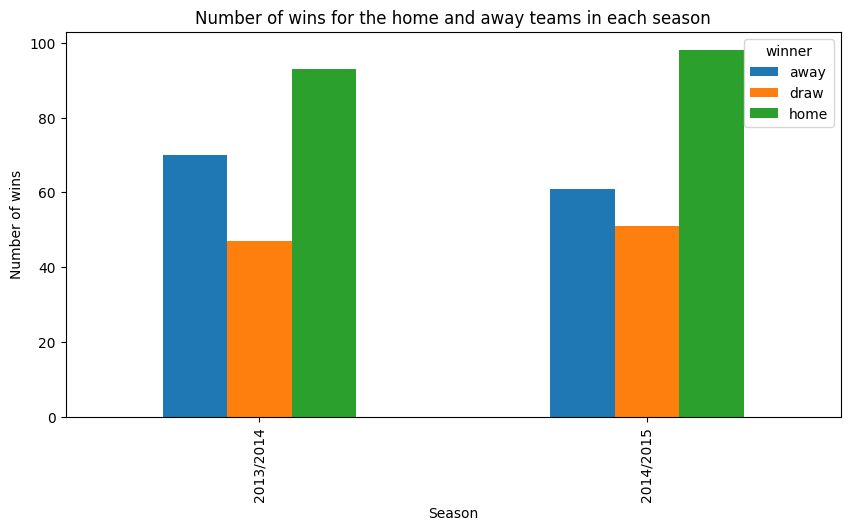

In [35]:
# Now we will plot the number of wins for the home and away teams for each season
wins.plot(kind='bar', figsize=(10, 5))
plt.title('Number of wins for the home and away teams in each season')
plt.xlabel('Season')
plt.ylabel('Number of wins')
plt.show()

We can conclude that in both seasons the home teams tend to win more than the away teams. <br>

### 3. What team defensive attribute classes are the most used. And which ones lead to the most victories?

In [24]:
# First we will now create a dataframe that will contain the deffensive attributes for each team
defence_df = match_df[['home', 'home_pressure', 'home_aggression', 'home_width', 'home_defenderLine']]
defence_df = defence_df.drop_duplicates()
defence_df = defence_df.reset_index(drop=True)
defence_df = defence_df.rename(columns={'home': 'team', 'home_pressure': 'pressure', 'home_aggression': 'aggression', 'home_width': 'width', 'home_defenderLine': 'defenderLine'})
defence_df

,team,pressure,aggression,width,defenderLine
0,Arsenal,Deep,Press,Normal,Cover
1,Swansea City,High,Double,Wide,Cover
2,Liverpool,Medium,Press,Normal,Cover
3,West Bromwich Albion,High,Double,Wide,Cover
4,Manchester City,Medium,Press,Normal,Cover
5,Chelsea,Deep,Press,Normal,Cover
6,Southampton,High,Double,Wide,Cover
7,Everton,Medium,Double,Normal,Cover
8,Aston Villa,Deep,Double,Narrow,Cover
9,Newcastle United,Medium,Press,Normal,Cover


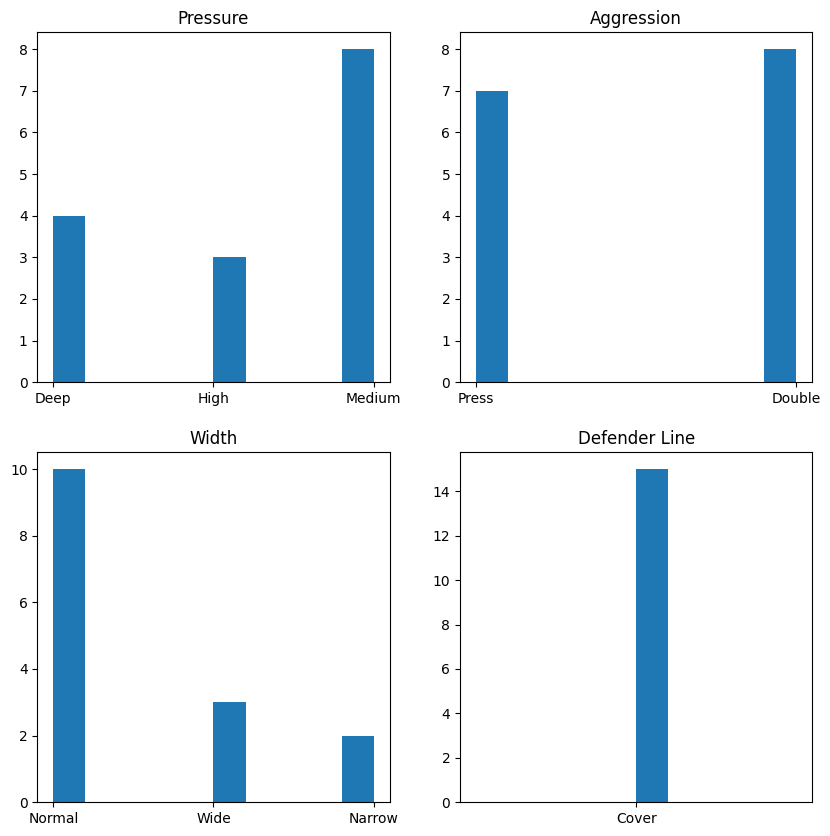

In [41]:
# Next we will plot a histogram for each deffensive attribute to see the distribution of the values
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(defence_df['pressure'])
axs[0, 0].set_title('Pressure')
axs[0, 1].hist(defence_df['aggression'])
axs[0, 1].set_title('Aggression')
axs[1, 0].hist(defence_df['width'])
axs[1, 0].set_title('Width')
axs[1, 1].hist(defence_df['defenderLine'])
axs[1, 1].set_title('Defender Line')
plt.show()

We can observe the following from the graphs above:
> 1. The most used pressing type is medium. And the least being high.
> 2. The most used aggression type is double aggression. And the least being pressing aggression.
> 3. The most used team width type is normal. And the least being narrow.
> 4. The only type of defensive line used is cover.

In [26]:
# Now we will see the number of wins for each team
wins_by_team = match_df.groupby('home')['winner'].apply(lambda x: (x == 'home').sum()) + match_df.groupby('away')['winner'].apply(lambda x: (x == 'away').sum())
wins_by_team = wins_by_team.sort_values(ascending=False)
wins_by_team = wins_by_team.reset_index()
wins_by_team.columns = ['team', 'wins']

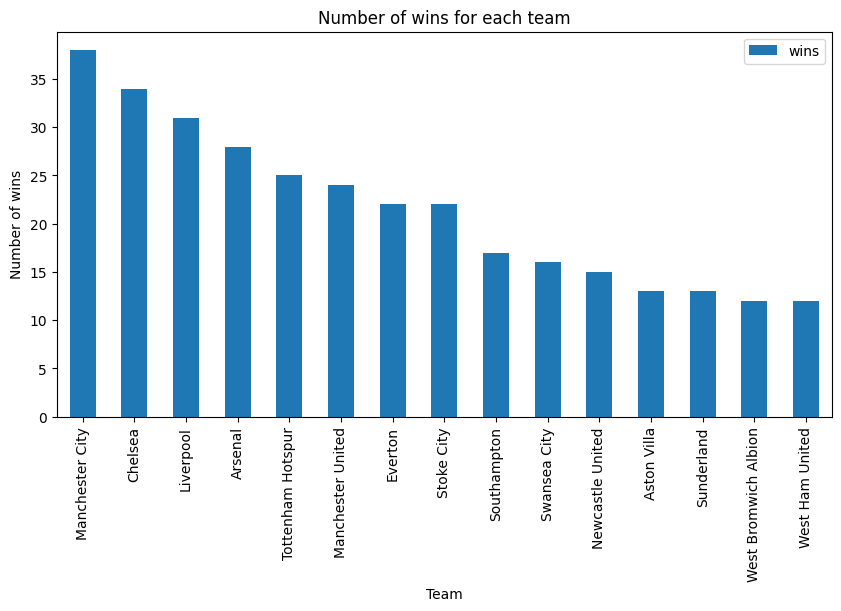

In [38]:
# We will now plot the number of wins for each team as a bar chart
plot_chart('bar', wins_by_team, 'team', 'wins', 'Number of wins for each team', 'Team', 'Number of wins', (10, 5))

We can see that the team with the most victories in the seasons 2013/2014 and 2014/2015 is Manchester City. Then in second it is Chelsea <br>
Also we can see that the two teams with the least victories in the seasons 2013/2014 and 2014/2015 are West Ham United, and West Bromwich Albion. <br>
So, we will study the defensive attributes of these four teams to see if there is a relation between the defensive attributes and the number of victories. <br>

In [28]:
# We will join the wins_by_team dataframe with the defence_df dataframe to see map the number of wins with the deffensive attributes clearly
wins_by_team = wins_by_team.merge(defence_df, on='team')
wins_by_team

,team,wins,pressure,aggression,width,defenderLine
0,Manchester City,38,Medium,Press,Normal,Cover
1,Chelsea,34,Deep,Press,Normal,Cover
2,Liverpool,31,Medium,Press,Normal,Cover
3,Arsenal,28,Deep,Press,Normal,Cover
4,Tottenham Hotspur,25,Medium,Press,Normal,Cover
5,Manchester United,24,Medium,Press,Normal,Cover
6,Everton,22,Medium,Double,Normal,Cover
7,Stoke City,22,Medium,Double,Normal,Cover
8,Southampton,17,High,Double,Wide,Cover
9,Swansea City,16,High,Double,Wide,Cover


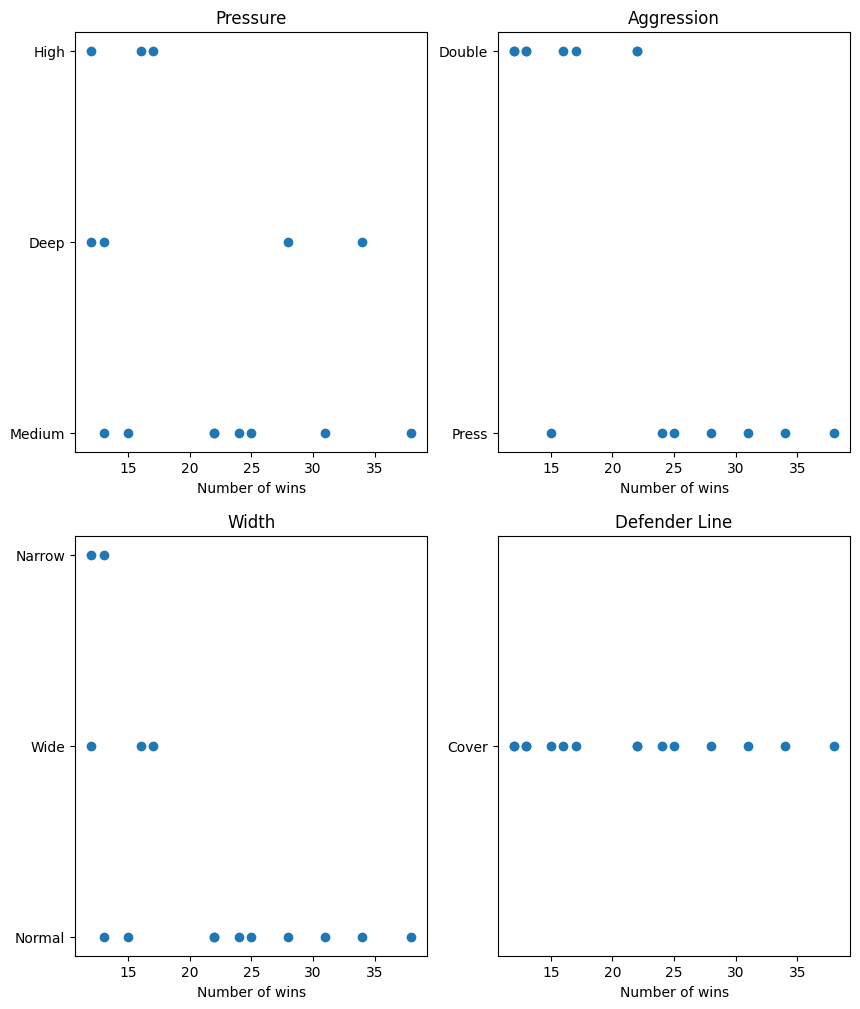

In [40]:
# We could plot a scatter plot for each deffensive attribute to see the relationship between the number of wins and the deffensive attributes
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs[0, 0].scatter(wins_by_team['wins'], wins_by_team['pressure'])
axs[0, 0].set_title('Pressure')
axs[0, 0].set_xlabel('Number of wins')
axs[0, 1].scatter(wins_by_team['wins'], wins_by_team['aggression'])
axs[0, 1].set_title('Aggression')
axs[0, 1].set_xlabel('Number of wins')
axs[1, 0].scatter(wins_by_team['wins'], wins_by_team['width'])
axs[1, 0].set_title('Width')
axs[1, 0].set_xlabel('Number of wins')
axs[1, 1].scatter(wins_by_team['wins'], wins_by_team['defenderLine'])
axs[1, 1].set_title('Defender Line')
axs[1, 1].set_xlabel('Number of wins')
plt.show()


We can observe the following from the graphs above:
> 1. In terms of pressing type, there is no strong relation between the number of victories and the pressing type.
> 2. In terms of aggression type, we can see that teams pressing aggression tend to win more than teams with double aggression.
> 3. In terms of width type, we can see that teams with normal width tend to win more than teams with narrow, and wide widths.
> 4. The only type of defensive line used is cover. So there is no relation that can be observed from this type.

<a id='conclusions'></a>
## Conclusions

In this project, I chose to analyze the European Soccer Database. I focused on the English Premier League (EPL) only. Furthermore, data from seasons 2013/2014 and 2014/2015 were used. <br>
I focused on the following questions:
> 1. Which season has the most goals? In each season who scored more home or away teams? And which team has the most goals?
> 2. What teams tend to win more, home or away teams?
> 3. What team defensive attribute classes are the most used. And which ones lead to the most victories?
<br><br>
For the first question, I found that in 2013/2014 season, there were more goals scored than in 2014/2015 season. <br>
Also, I found that in both seasons the home teams scored more goals than the away teams. In both season <br>
Furthermore, I found that the team with more goals scored in the seasons 2013/2014 and 2014/2015 is Manchester city. And the least is Newcastle United <br><br>
For the second question, I found that in both seasons the home teams tend to win more than the away teams. <br><br>
For the third question, I found that the most used pressing type is medium. And that there is only one defensive line shape used in the EPL which is cover shape <br>
Also to study the effect of the defensive shapes on winning games. I found that the team with the most victories in the seasons 2013/2014 and 2014/2015 is Manchester City. And the teams with the least wins are West Ham United, and West Bromwitch Albion <br>
Moreover, in terms of the effect of the defensive attributes on winning games. The two attributes that really affect the number of victories are the aggression type, and the width type. As pressing aggression and normal width being the most effective shapes.

Furthermore, in this project I faced two limitations:
> 1. The first limitation is that not all the EPL teams were available in the database. And one of the teams that was available did not had the same number of the matches as the other teams. So I had to remove this team from the analysis.
> 2. The second limitation is that I wanted to do analysis on the matches statistics, such as possession and shots on target. However, these columns were stored in an ureadable format. So I had to refrain from using them in the analysis. 

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1